# Try it yourselves ! 

## Get the Lesson's code

In [ ]:
!git clone https://github.com/nathanhubens/MultimedIA.git

Cloning into 'MultimedIA'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 1), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [ ]:
cd MultimedIA/Lesson\ 2

/content/MultimedIA/Lesson 2


### Import librairies

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

from fastai.vision import *

from nn import *
from plotlib import *

### Setup the GPU (don't forget to activate it !)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


We will work with CIFAR10, a dataset composed of small images from 10 classes

In [ ]:
# Where to find the data
path = untar_data(URLs.CIFAR)

In [ ]:
# The size of images and the size of the batch (how many images we give to the network at once)
batch_size, image_size = 256, 32

In [ ]:
data = get_data(path, batch_size, image_size, None, device=device)

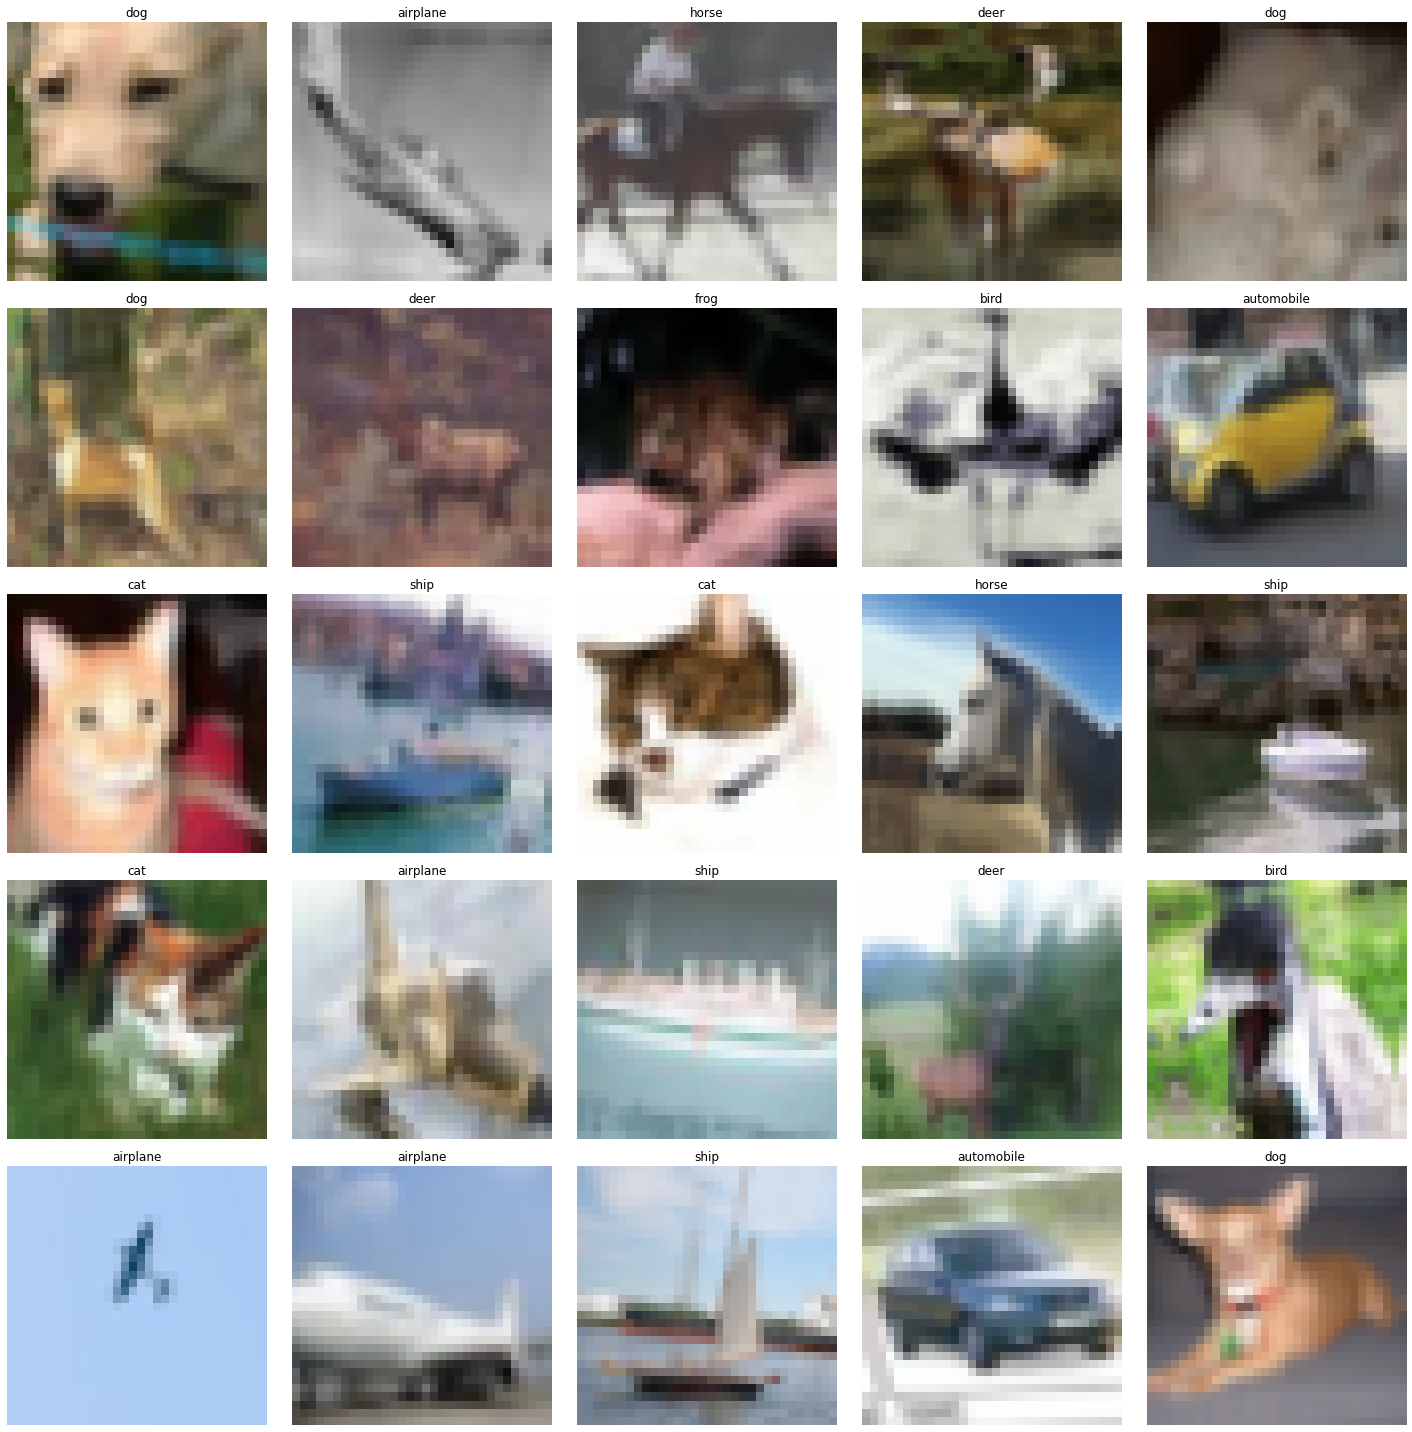

In [ ]:
data.show_batch()

In [ ]:
# The size of the input and output of the network
input_size = 3*32*32 # Our images are color (RGB) and of dimension 32x32 => 3*32*32
output_size = 10 # We have 10 classes of images => Output=10
n_features = 128

In [ ]:
# Let's create a MLP 
model = MLPModel(input_size, n_features, output_size).to(device)

In [ ]:
# How many parameters does it contain ? 
count_parameters(model)

Number of parameters: 404,378


In [ ]:
# Let's create a Learner with our model and our data
learn = Learner(data, model, metrics=[accuracy])

In [ ]:
# Train our model
learn.fit(epochs = 3)

epoch,train_loss,valid_loss,accuracy,time
0,1.707054,1.586955,0.442100,01:20
1,1.592158,1.520170,0.462400,01:19
2,1.524216,1.436118,0.491200,01:19


## Let's use a CNN ! 

In [ ]:
n_features = 8

In [ ]:
# Create a CNN
model = CNNModel(n_features, output_size).to(device)

In [ ]:
# Create a Learner
learn = Learner(data, model, metrics=[accuracy])

In [ ]:
# Count the parameters
count_parameters(model)

Number of parameters: 262,926


In [ ]:
# Train
learn.fit(epochs = 3)

epoch,train_loss,valid_loss,accuracy,time
0,1.501285,1.316257,0.514700,01:21
1,1.283320,1.167935,0.574100,01:20
2,1.166520,1.102412,0.607600,01:19


## Exercices to try: 

Train your models for more epochs, what happens ? (★☆☆)

Change the batch size, what happens ? (★☆☆)



Change the image size, what happens ? (★☆☆)

If you change the values of `n_features`, what happens ? (★☆☆)

Go to the source code of `nn.py` and get the `MLPModel` code. Remove the non-linearities (ReLU) from the `forward` method. What happens if you train the network now ? (★★☆)

Do the same for the `CNNModel` (★★☆)

Do you see a relation between the number of parameters and the final accuracy ? (★☆☆)

Try to add more layers to the networks and to see what happens (★★★)